In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,recall_score,precision_score,confusion_matrix

from pyod.models.copod import COPOD
from pyod.utils.utility import precision_n_scores
from pyod.utils.data import evaluate_print

In [2]:
df = pd.read_excel('FinancialMarketData.xlsx', sheet_name = 'EWS')
target = pd.DataFrame(df['Y'])
target.columns = ['Anomaly']
target = target.iloc[0:1110,:]

signal = pd.read_csv('segnali.csv')
signal = signal.drop(columns=['Data'])

X_train, X_test, y_train, y_test = train_test_split(signal, target, test_size=0.05, random_state=42, shuffle=False)

In [3]:
#Estimate of anomaly in the data
perc = 0
for i in range(len(y_train)):
    perc = perc + y_train.iloc[i,0]
perc=perc/len(y_train)

In [4]:
clf_name = 'COPOD'

clf = COPOD(contamination = perc)  
clf.fit(X_train)                    
y_pred = clf.predict(X_test)
    
#Statistiche
roc = round(roc_auc_score(y_test, y_pred), ndigits=3)
f1 = round(f1_score(y_test, y_pred), ndigits=3)
acc = round(accuracy_score(y_test, y_pred), ndigits=3)
rec = round(recall_score(y_test, y_pred), ndigits=3)
prec = round(precision_score(y_test, y_pred), ndigits=3)
print('ROC:',roc,'Accuracy:',acc,'Precision:',prec,'Recall:',rec,'F1:',f1)

ROC: 0.763 Accuracy: 0.786 Precision: 0.632 Recall: 0.706 F1: 0.667


In [5]:
test_scores = clf.decision_function(X_test) #Value of the impurity function for observation
train_scores = clf.decision_function(X_train)

print("\nOn Training Data:")
evaluate_print(clf_name, y_train, train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, test_scores)


On Training Data:
COPOD ROC:0.7746, precision @ rank n:0.4773

On Test Data:
COPOD ROC:0.8643, precision @ rank n:0.7059


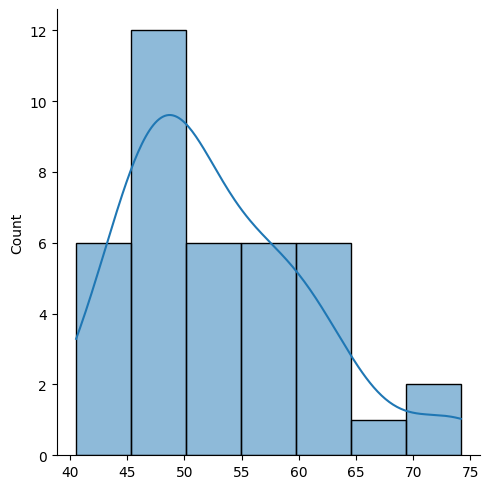

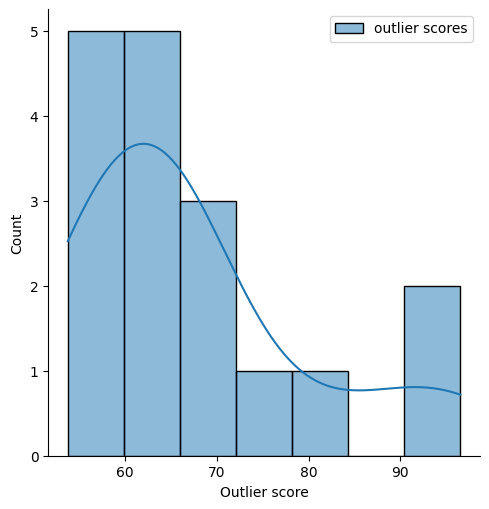

In [6]:
# outlier and inlier distributions
sns.displot(test_scores[y_test.iloc[:,0]==0], label="inlier scores", kde = True)
sns.displot(test_scores[y_test.iloc[:,0]==1], label="outlier scores", kde = True)#.set_title("Distribution of Outlier Scores from Unfitted COPOD Detector")
plt.legend()
plt.xlabel("Outlier score")
plt.show()

<IPython.core.display.Javascript object>


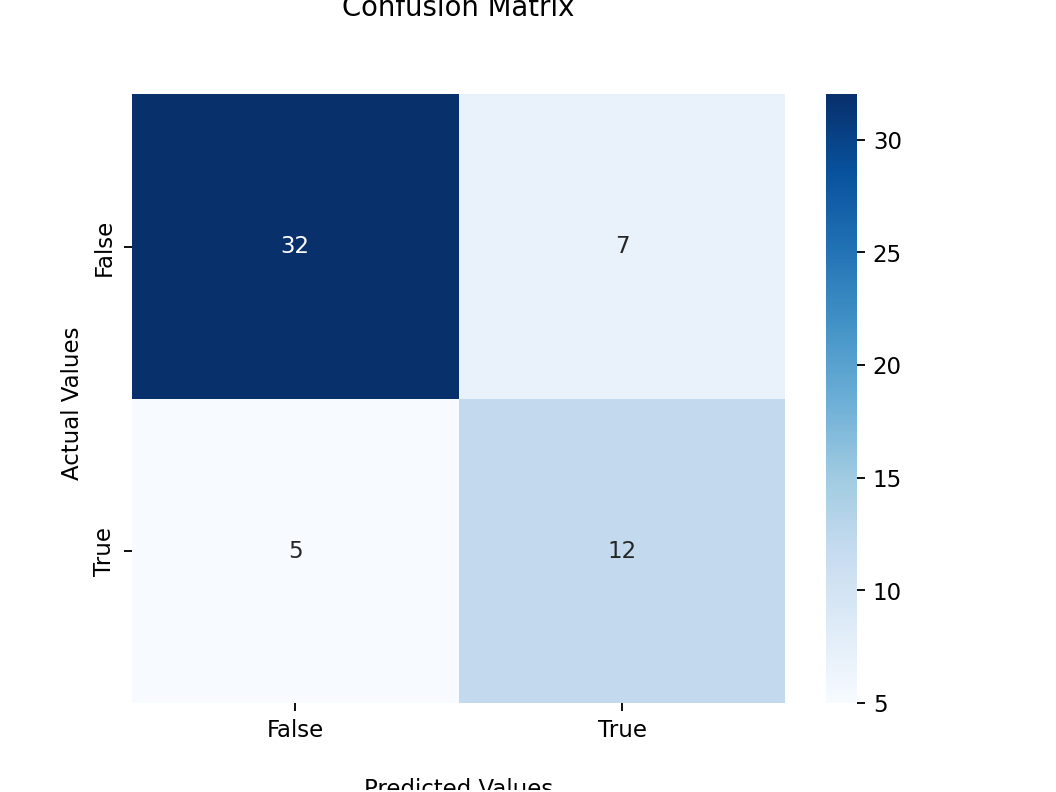

In [7]:
%matplotlib notebook

cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [8]:
#Outlier score breakdown for sample
# train_outliers_idx = np.where(y_train==1)[0]
# for idx in train_outliers_idx:
#     clf.explain_outlier(idx, cutoffs=None, feature_names=None)